In [2]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
poly = np.polynomial.Polynomial

from astropy.io import ascii

from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter1d
from scipy.misc import derivative

In [3]:
easymini = ascii.read("TMHEasyMiniData.txt", data_start = 14)
stratologger = ascii.read("TMHStratoData.txt", data_start = 15)

In [4]:
emAlt = easymini["altitude"]
emPress = easymini["pressure"]
emAccel = easymini["acceleration"]
emTime = easymini["time"]

slAlt = stratologger["col2"]
slVel = stratologger["col3"]
slTime = stratologger["col1"]

In [8]:
# to read Py simulation data from CSV into lists
import pandas
df = pandas.read_csv('20SimData.csv')    # data frame
simTime = df['time'].astype(float).values.tolist()
simAlt = df['altitude'].astype(float).values.tolist()
simVel = df['velocity'].astype(float).values.tolist()
simAcc = df['acceleration'].astype(float).values.tolist()

In [9]:
# read open rocket simulation data from CSV into lists
df = pandas.read_csv('Sub2019OpenRocketData.csv')    # data frame
ORTime = df['Time (s)'].astype(float).values.tolist()
ORAlt = df['Altitude (m)'].astype(float).values.tolist()
ORVel = df['Vertical velocity (m/s)'].astype(float).values.tolist()
ORAcc = df['Vertical acceleration (m/s^2)'].astype(float).values.tolist()
ORCd = df['Drag coefficient'].astype(float).values.tolist()
ap_index = argmax(ORAlt)

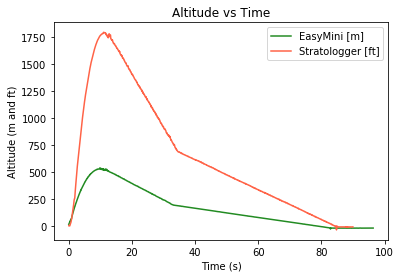

In [10]:
plot(emTime, emAlt, c = "forestgreen", label = "EasyMini [m]")
plot(slTime, slAlt, c = "tomato", label = "Stratologger [ft]")
legend()
title("Altitude vs Time")
xlabel("Time (s)")
ylabel("Altitude (m and ft)")
show()

In [11]:
# convert stratologger data to meters
mToFt = 3.2808
slAltM = [x/mToFt for x in slAlt]
slVel = [x/mToFt for x in slVel]

In [12]:
# TRY TO ALIGN ALTITUDE
# align by small downward spike in tail
slMinInd = 1600 + argmin(slAltM[1600:1700])
emMinInd = 1900 + argmin(emAlt[1900:2000])
diffAlt = slAltM[slMinInd] - emAlt[emMinInd]
diffTime = slTime[slMinInd] - emTime[emMinInd]
# print diffAlt 
# print diffTime

emAltOld = emAlt
emTimeOld = emTime
emAlt = [h + diffAlt for h in emAlt]
emTime = [t + diffTime for t in emTime]



In [13]:
# APOGEE
slApogee = slTime[argmax(slAltM)]
emApogee = emTime[argmax(emAlt)]
print 'Apogee at '
print max(slAltM)
print max(emAlt)
print slApogee
print emApogee

Apogee at 
547.1226530114606
553.9426554498903
11.05
11.71


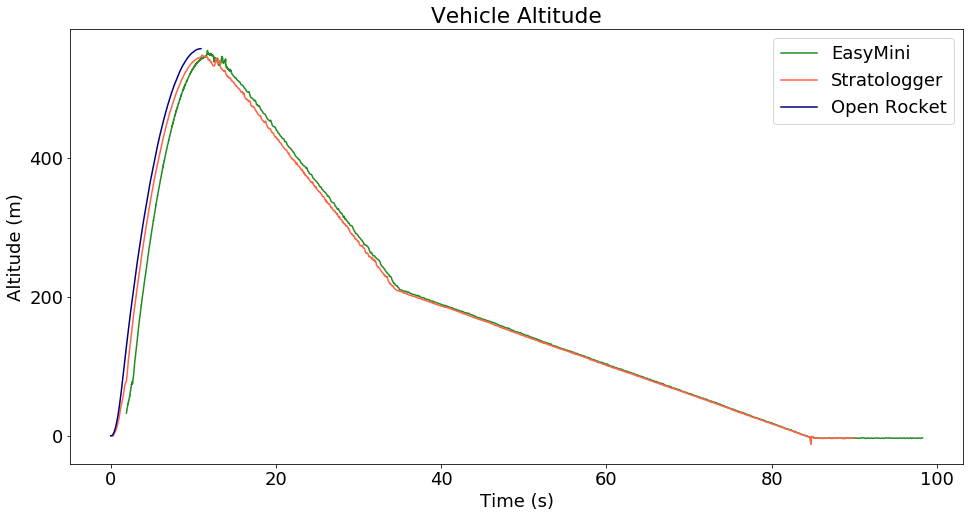

In [46]:
# ADJUSTED ALTITUDE
figure(figsize = (16,8))
plot(emTime, emAlt, c = "forestgreen", label = "EasyMini")
plot(slTime, slAltM, c = "tomato", label = "Stratologger")
plot(ORTime[0:ap_index], ORAlt[0:ap_index], c = "navy", label = "Open Rocket")
legend()
title("Altitude vs Time")
xlabel("Time (s)")
ylabel("Altitude (m)")
title("Vehicle Altitude")
rcParams["font.size"] = 36
savefig("vehiclealtitude")

show()

In [27]:
# VELOCITY
emVel = [0.0] + [dx / dt for dx, dt in zip(diff(emAlt), diff(emTime))]
smoothVel = gaussian_filter1d(emVel, 10)

time_diff = slTimeC[argmax(slVel)] - emTime[argmax(smoothVel)]
print time_diff
print slTimeC[argmax(slVel)]
print emTime[argmax(smoothVel)]


c:\python27\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


NameError: name 'slTimeC' is not defined

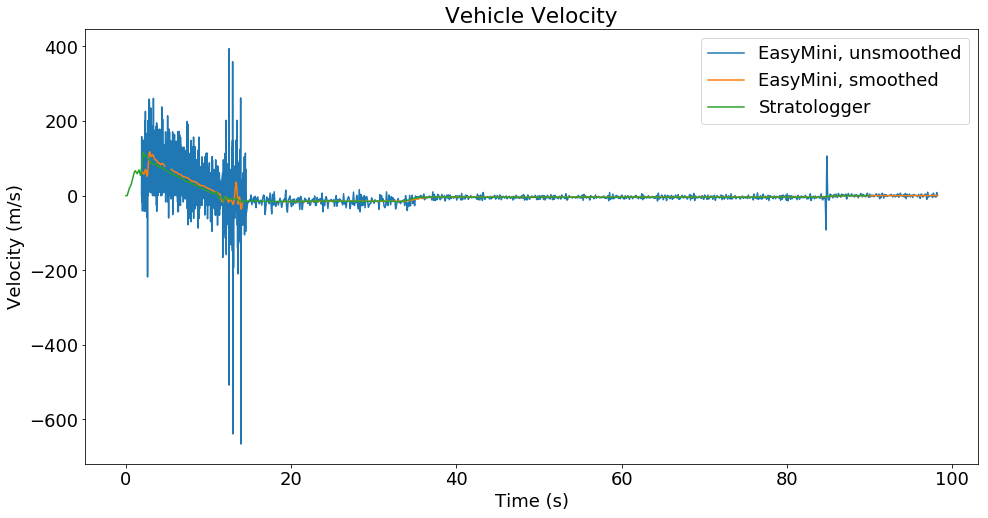

In [45]:
figure(figsize = (16, 8))
plot(emTime, emVel, label = "EasyMini, unsmoothed")
plot(emTime, smoothVel, label = "EasyMini, smoothed")
plot(slTime, slVel, label = "Stratologger")
legend()
title("Vehicle Velocity")
xlabel("Time (s)")
ylabel("Velocity (m/s)")
rcParams["font.size"] = 18
savefig("vehiclevelocityUNSMOOTH")

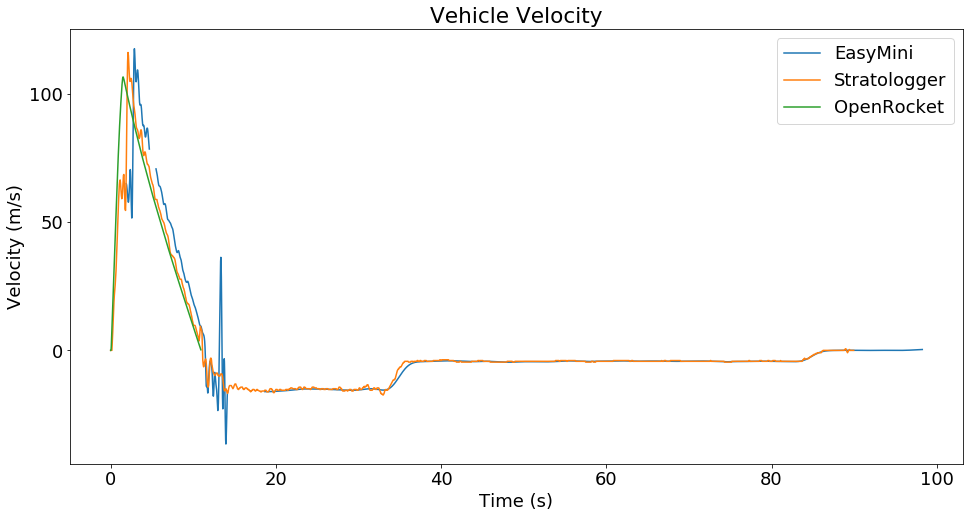

In [43]:
figure(figsize = (16, 8))
plot(emTime, smoothVel, label = "EasyMini")
plot(slTime,slVel, label = "Stratologger")
plot(ORTime[0:ap_index], ORVel[0:ap_index], label = "OpenRocket")
legend()
title("Vehicle Velocity")
xlabel("Time (s)")
ylabel("Velocity (m/s)")
rcParams["font.size"] = 36
savefig("vehiclevelocity")

In [17]:
emMax = max(emAlt)
slMax =  max(slAltM)
print(emTime[argmax(emAlt)])
print emMax, slMax

# percent difference from the average
percentDiff = abs(slMax - emMax)/((slMax + emMax) / 2.) * 100
print percentDiff

11.71
553.9426554498903 547.1226530114606
1.2388007116417272


ACCELERATION

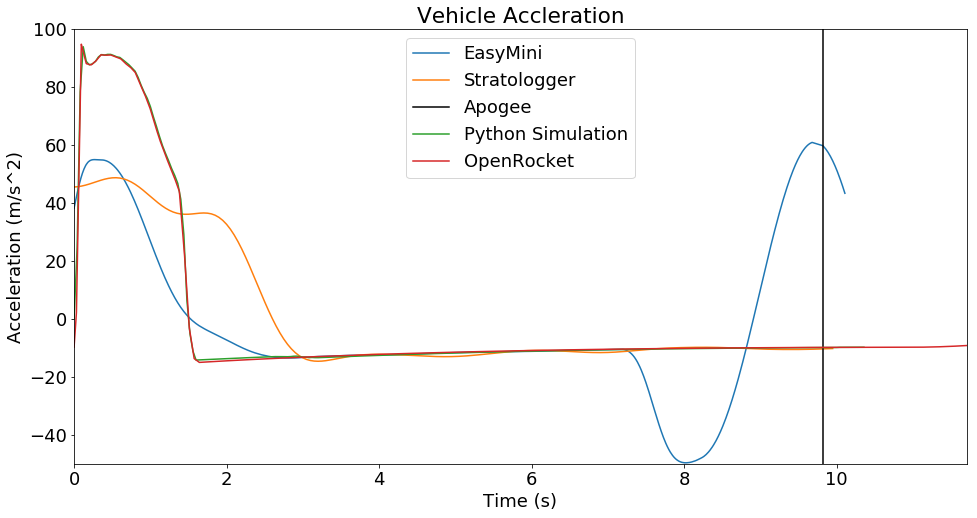

In [49]:
# ACCELERATION
# emAccel[970:] = emAccel[970:] * -1
figure(figsize = (16, 8))
slAccel = [0.0] + [dv/dt for dv, dt in zip(diff(slVel), diff(slTime))]
smooth_slAccel = gaussian_filter1d(slAccel, 10)
e1, e2 = 0, 1000
s1, s2 = 0, 200
plot([t - emTime[0] for t in emTime[e1:e2]], [x+0 for x in emAccel[e1:e2]], label='EasyMini')
plot(slTime[s1:s2], smooth_slAccel[s1:s2], label='Stratologger')
axvline(x=emApogee-diffTime, color='black', label='Apogee')
# axvline(x=emTime[970], color='red')
plot(simTime, simAcc, label='Python Simulation')
plot(ORTime, ORAcc, label = 'OpenRocket')
legend()
xlim(0, emApogee)
ylim(-50, 100)
#print (emTime[0])
title("Vehicle Accleration")
xlabel("Time (s)")
ylabel("Acceleration (m/s^2)")
rcParams["font.size"] = 18
savefig("vehicleacceleration")

(0, 1)

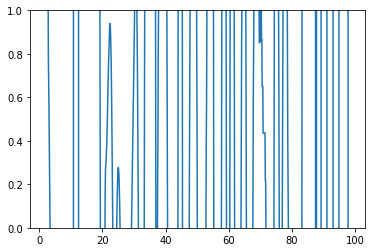

In [19]:
# DRAG COEFFICIENTS
T = 290 # [K]
R = 287 # [J/(kg*K)]
rho = [x / (T*R) for x in emPress]  # [kg/m^2]


inToM = 0.0254
A = (3.15**2 * pi + 4 * .25 * 3.5) * inToM**2   #[m^2]
m = 5.127    # [kg] dry mass
C = 2 * m / A   # [kg/m^2]
cd = []
for i in range(len(emPress)) :
    v = smoothVel[i]
    a = emAccel[i]
    #stupid time issue, will work on later
    cd.append(C * a / (v**2 * rho[i]))
plot(emTime, cd)
# xlim(0,10)
ylim(0,1)

In [138]:
print ORTime[1] - ORTime[0]

0.00015
